In [ ]:
from google.colab import files
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal
from scipy.stats import ks_2samp
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['owid-covid-data.csv']))

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=df.fillna(0)
df_ind = df.loc[df["location"] == "India"]
df_sa = df.loc[df["location"] == "South Africa"]
df_zim = df.loc[df["location"] == "Zimbabwe"]
df_afg = df.loc[df["location"] == "Afghanistan"]
df_ind=df_ind.iloc[:,[3,5]]
df_sa=df_sa.iloc[:,[3,5]]
df_zim=df_zim.iloc[:,[3,5]]
df_afg=df_afg.iloc[:,[3,5]]

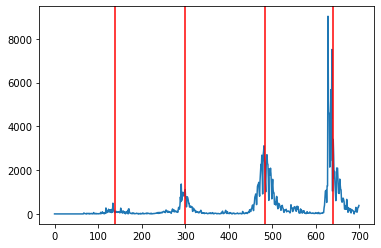

In [ ]:
plt.plot(df_zim['date'], df_zim['new_cases'])

plt.axvline(x=137.85,color='r')
plt.axvline(x=299.40,color='r')
plt.axvline(x=483.53,color='r')
plt.axvline(x=640.53,color='r')
plt.show()


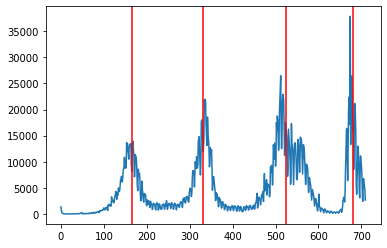

'[[165.43535011]\n [331.06056181]\n [501.73175421]\n [530.60814605]\n [553.9883369 ]\n [700.50505798]]\n[[166.0013952 ]\n [331.18630151]\n [525.3876839 ]\n [680.26365708]]\n \n '

In [ ]:
plt.plot(df_sa['date'], df_sa['new_cases'])

plt.axvline(x=165.43,color='r')
plt.axvline(x=331.18,color='r')
plt.axvline(x=525.38,color='r')
plt.axvline(x=680.26,color='r')
plt.show()

"""[[165.43535011]
 [331.06056181]
 [501.73175421]
 [530.60814605]
 [553.9883369 ]
 [700.50505798]]
[[166.0013952 ]
 [331.18630151]
 [525.3876839 ]
 [680.26365708]]

 """

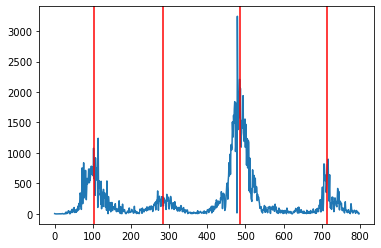

'\n[[104.06155569]\n [282.91271451]\n [486.09697737]\n [713.78943904]]\n'

In [ ]:
plt.plot(df_afg['date'], df_afg['new_cases'])

plt.axvline(x=104.06,color='r')
plt.axvline(x=282.91,color='r')
plt.axvline(x=486.10,color='r')
plt.axvline(x=713.79,color='r')
plt.show()

"""
[[104.06155569]
 [282.91271451]
 [486.09697737]
 [713.78943904]]
"""

In [ ]:
df_zim=df_zim.iloc[:700,:]
df_sa=df_sa.iloc[:710,:]

In [ ]:
df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)

In [ ]:
m,d,y=df_ind.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ind.index.max()+1):
  m1,d1,y1=df_ind.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ind.iloc[i,0]=(date1-date0).days
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
df_ind['new_cases']=df_ind['new_cases'].astype(int)

m,d,y=df_sa.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_sa.index.max()+1):
  m1,d1,y1=df_sa.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_sa.iloc[i,0]=(date1-date0).days
  if df_sa.iloc[i,1]==0:
    df_sa.iloc[i,1]=(df_sa.iloc[i-1,1]+df_sa.iloc[i+1,1])/2
df_sa['new_cases']=df_sa['new_cases'].astype(int)

m,d,y=df_zim.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_zim.index.max()+1):
  m1,d1,y1=df_zim.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_zim.iloc[i,0]=(date1-date0).days
  if df_zim.iloc[i,1]==0:
    df_zim.iloc[i,1]=df_zim.iloc[i+1,1]/2
    df_zim.iloc[i+1,1]=df_zim.iloc[i+1,1]-df_zim.iloc[i,1]
df_zim['new_cases']=df_zim['new_cases'].astype(int)

m,d,y=df_afg.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_afg.index.max()+1):
  m1,d1,y1=df_afg.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_afg.iloc[i,0]=(date1-date0).days
  if df_afg.iloc[i,1]==0:
    df_afg.iloc[i,1]=(df_afg.iloc[i-1,1]+df_afg.iloc[i+1,1])/2
df_afg['new_cases']=df_afg['new_cases'].astype(int)

arr_ind=np.array([0])
arr_ind=arr_ind.reshape(-1,1)
arr_ind0=np.array(df_ind)
lim=df_ind.index.max()+1
for i in range(1,lim):
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
  day=arr_ind0[i][0]
  num_cases=arr_ind0[i][1]
  arr_ind=np.vstack((arr_ind,np.full((num_cases,1),day)))

arr_sa=np.array([0])
arr_sa=arr_sa.reshape(-1,1)
arr_sa0=np.array(df_sa)
lim=df_sa.index.max()+1
for i in range(1,lim):
  day=arr_sa0[i][0]
  num_cases=arr_sa0[i][1]
  arr_sa=np.vstack((arr_sa,np.full((num_cases,1),day)))

arr_zim=np.array([0])
arr_zim=arr_zim.reshape(-1,1)
arr_zim0=np.array(df_zim)
lim=df_zim.index.max()+1
for i in range(1,lim):
  day=arr_zim0[i][0]
  num_cases=arr_zim0[i][1]
  arr_zim=np.vstack((arr_zim,np.full((num_cases,1),day)))

arr_afg=np.array([0])
arr_afg=arr_afg.reshape(-1,1)
arr_afg0=np.array(df_afg)
lim=df_afg.index.max()+1
for i in range(1,lim):
  day=arr_afg0[i][0]
  num_cases=arr_afg0[i][1]
  arr_afg=np.vstack((arr_afg,np.full((num_cases,1),day)))

[[1.36466722]]


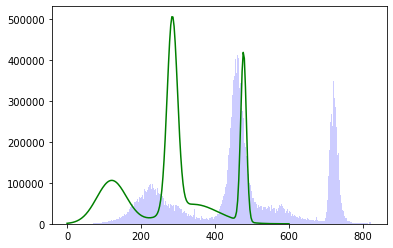

In [ ]:
ms=[232.37,460.27,553.03,722.86]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, random_state=0,means_init=ms).fit(arr_ind)

print(g.means_)

In [ ]:
ms=[139.873,257.044,299.802,499.212,630]
ms=np.array(ms)
ms=ms.reshape(5,1)
g=GaussianMixture(n_components=5,means_init=ms).fit(arr_zim)

print(g.means_)

[[137.09915806]
 [300.52953089]
 [298.9293571 ]
 [490.21680375]
 [640.53027534]]


In [ ]:
ms=[145.41,332.79,510,690]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, random_state=0,means_init=ms).fit(arr_sa)

print(g.means_)

[[166.0013952 ]
 [331.18630151]
 [525.3876839 ]
 [680.26365708]]


In [ ]:
ms=[104.08,282.89,486.08,705]
ms=np.array(ms)
ms=ms.reshape(4,1)
g=GaussianMixture(n_components=4, random_state=0,means_init=ms).fit(arr_afg)

print(g.means_)

[[104.06155569]
 [282.91271451]
 [486.09697737]
 [713.78943904]]


In [ ]:
print((460.27-232.37)/(299.40-137.85),(722.86-460.27)/(483.53-299.40),(640.53-483.53))
print((460.27-232.37)/(331.18-165.43),(722.86-460.27)/(525.38-331.18),(680.26-525.38))
print((460.27-232.37)/(282.91-104.06),(722.86-460.27)/(486.10-282.91),(713.79-486.10))

1.410708758898174 1.4261119860967797 157.0
1.3749622926093512 1.3521627188465501 154.88
1.2742521666200723 1.292337221319947 227.68999999999994


In [ ]:
print(((460.27-232.37)/(299.40-137.85)+(722.86-460.27)/(483.53-299.40))/2*(640.53-483.53))
print(((460.27-232.37)/(331.18-165.43)+(722.86-460.27)/(525.38-331.18))/2*(680.26-525.38))
print(((460.27-232.37)/(282.91-104.06)+(722.86-460.27)/(486.10-282.91))/2*(713.79-486.10))

222.69042848210387
211.18856088714497
292.1933688700314


In [ ]:
list1=[222.69,211.19,292.19]
for i in range(3):
  x=722.86+list1[i]
  from datetime import date
  date0=date(2020,1,30)

  from datetime import timedelta
  y=date0+timedelta(days=x)
  print(y)

2022-09-01
2022-08-21
2022-11-10
